In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [60]:
files = [
    "2024-02-01-03-25-51-vicon-spirit-spirit.csv",
    "2024-02-01-03-25-51-zp_500n.csv",
    "2024-02-01-03-54-21-zp_500n.csv"
]

timestamps = {
    "isaacs_margin": {
        # start, stop, result (1: pass, 0: fail)
        "left_low": ['2024/02/01/03:26:19', '2024/02/01/03:26:28', 1], 
        "left_high": ['2024/02/01/03:26:44', '2024/02/01/03:26:51', 1], 
        "right_low": ['2024/02/01/03:28:09', '2024/02/01/03:28:13', 0], 
        "right_high": ['2024/02/01/03:28:33', '2024/02/01/03:28:40', 1]
    },
    "isaacs_penalty": {
        "left_low": ['2024/02/01/03:31:00', '2024/02/01/03:31:03', 0], 
        "left_high": ['2024/02/01/03:31:28', '2024/02/01/03:31:31', 0], 
        "right_low": ['2024/02/01/03:32:13', '2024/02/01/03:32:16', 0], 
        "right_high": ['2024/02/01/03:32:51', '2024/02/01/03:32:55', 0]
    },
    "sac_margin": {
        "left_low": ['2024/02/01/03:35:38', '2024/02/01/03:35:43', 0], 
        "left_high": ['2024/02/01/03:36:35', '2024/02/01/03:36:41', 0], 
        "right_low": ['2024/02/01/03:37:44', '2024/02/01/03:37:47', 0], 
        "right_high": ['2024/02/01/03:38:51', '2024/02/01/03:38:58', 1]
    },
    "sac_penalty": {
        "left_low": ['', '', 0],  # auto fail
        "left_high": ['', '', 0], # auto fail
        "right_low": ['', '', 0], # auto fail
        "right_high": ['', '', 0] # auto fail
    },
    "task": {
        "left_low": ['2024/02/01/03:40:04', '2024/02/01/03:40:07', 0],
        "left_high": ['2024/02/01/03:40:30', '2024/02/01/03:40:33', 0],
        "right_low": ['2024/02/01/03:41:18', '2024/02/01/03:41:22', 0],
        "right_high": ['2024/02/01/03:42:08', '2024/02/01/03:42:13', 0]
    },
    "stable_stance": {
        "left_low": ['2024/02/01/03:54:39', '2024/02/01/03:54:43', 1],
        "left_high": ['2024/02/01/03:54:55', '2024/02/01/03:54:59', 1],
        "right_low": ['2024/02/01/03:55:23', '2024/02/01/03:55:26', 1],
        "right_high": ['2024/02/01/03:55:33', '2024/02/01/03:55:37', 1]
    }
}

In [41]:
def plot_run(model, force_type, ax=None):
    """
        model: isaacs_margin, isaacs_penalty, sac_margin, sac_penalty, task, stable_stance
        force_type: left_low, left_high, right_low, right_high
    """
    if ax is None:
        ax = plt.gca()
    start_time = timestamps[model][force_type][0]
    stop_time = timestamps[model][force_type][1]
    result = timestamps[model][force_type][2]
    d = data[(data["time"] >= start_time) & (data["time"] <= stop_time) & (data[".data"]>10.0)][".data"]
    ax.plot(d)
    print(d.describe())

In [76]:
data = pd.read_csv(files[2])

In [43]:
data.columns

Index(['time', '.header.seq', '.header.stamp.secs', '.header.stamp.nsecs',
       '.header.frame_id', '.data'],
      dtype='object')

count    21.000000
mean     62.142857
std      18.475865
min      12.000000
25%      62.799999
50%      70.699997
75%      72.599998
max      74.599998
Name: .data, dtype: float64


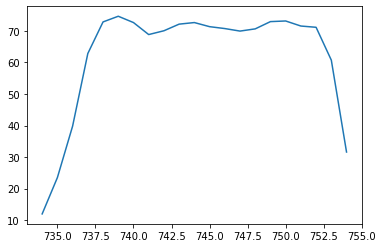

In [80]:
plot_run("stable_stance", "right_high")